Train class distribution: [8388 3121]
Test class distribution: [2097  781]

Accuracy: 0.7964
ROC AUC: 0.8018

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      2097
           1       0.68      0.48      0.56       781

    accuracy                           0.80      2878
   macro avg       0.75      0.70      0.71      2878
weighted avg       0.78      0.80      0.78      2878



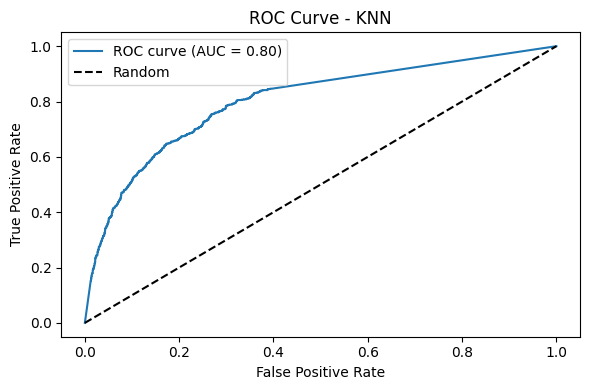


First 10 predictions for input_covid.csv:
Row 1: Probability of Positive = 0.203, Predicted Label = 0
Row 2: Probability of Positive = 0.604, Predicted Label = 1
Row 3: Probability of Positive = 0.622, Predicted Label = 1
Row 4: Probability of Positive = 0.348, Predicted Label = 0
Row 5: Probability of Positive = 0.207, Predicted Label = 0
Row 6: Probability of Positive = 0.207, Predicted Label = 0
Row 7: Probability of Positive = 0.196, Predicted Label = 0
Row 8: Probability of Positive = 0.603, Predicted Label = 1
Row 9: Probability of Positive = 0.169, Predicted Label = 0
Row 10: Probability of Positive = 0.608, Predicted Label = 1


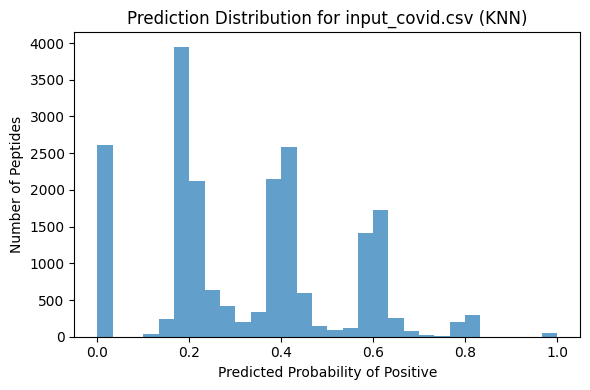

In [ ]:
#KNN

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# File paths

bcell_path = "/Users/bodapati/Documents/epitope dataset/input_bcell.csv"
covid_path = "/Users/bodapati/Documents/epitope dataset/input_covid.csv"

# Load data
df = pd.read_csv(bcell_path)

# Features and target
feature_cols = [
    "chou_fasman", "emini", "kolaskar_tongaonkar", "parker",
    "isoelectric_point", "aromaticity", "hydrophobicity", "stability"
]
X = df[feature_cols].values
y = df["target"].values

# Train/Test Split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train class distribution:", np.bincount(y_train))
print("Test class distribution:", np.bincount(y_test))

# Train KNN (you can tune n_neighbors as needed)
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)

# Evaluation
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]

print("\nAccuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("ROC AUC: {:.4f}".format(roc_auc_score(y_test, y_prob)))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend()
plt.tight_layout()
plt.show()

# Predict on COVID data
df_covid = pd.read_csv(covid_path)
X_covid = df_covid[feature_cols].values
covid_prob = knn.predict_proba(X_covid)[:, 1]
covid_pred = (covid_prob > 0.5).astype(int)

print("\nFirst 10 predictions for input_covid.csv:")
for i, (prob, label) in enumerate(zip(covid_prob[:10], covid_pred[:10])):
    print(f"Row {i+1}: Probability of Positive = {prob:.3f}, Predicted Label = {label}")

# Plot histogram of COVID predictions
plt.figure(figsize=(6,4))
plt.hist(covid_prob, bins=30, alpha=0.7)
plt.xlabel('Predicted Probability of Positive')
plt.ylabel('Number of Peptides')
plt.title('Prediction Distribution for input_covid.csv (KNN)')
plt.tight_layout()
plt.show()

Train class distribution: [8388 3121]
Test class distribution: [2097  781]

Accuracy: 0.8429
ROC AUC: 0.8809

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      2097
           1       0.76      0.62      0.68       781

    accuracy                           0.84      2878
   macro avg       0.81      0.77      0.79      2878
weighted avg       0.84      0.84      0.84      2878



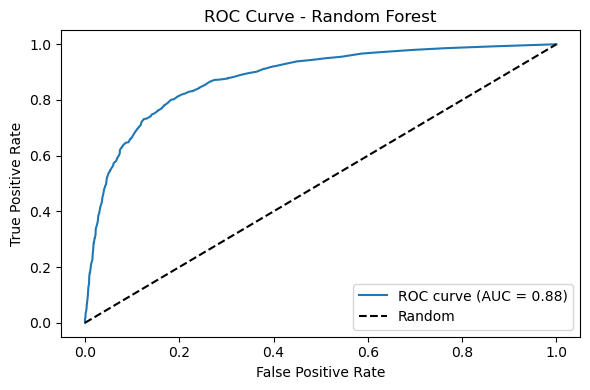


First 10 predictions for input_covid.csv:
Row 1: Probability of Positive = 0.640, Predicted Label = 1
Row 2: Probability of Positive = 0.580, Predicted Label = 1
Row 3: Probability of Positive = 0.620, Predicted Label = 1
Row 4: Probability of Positive = 0.650, Predicted Label = 1
Row 5: Probability of Positive = 0.670, Predicted Label = 1
Row 6: Probability of Positive = 0.670, Predicted Label = 1
Row 7: Probability of Positive = 0.580, Predicted Label = 1
Row 8: Probability of Positive = 0.640, Predicted Label = 1
Row 9: Probability of Positive = 0.650, Predicted Label = 1
Row 10: Probability of Positive = 0.670, Predicted Label = 1


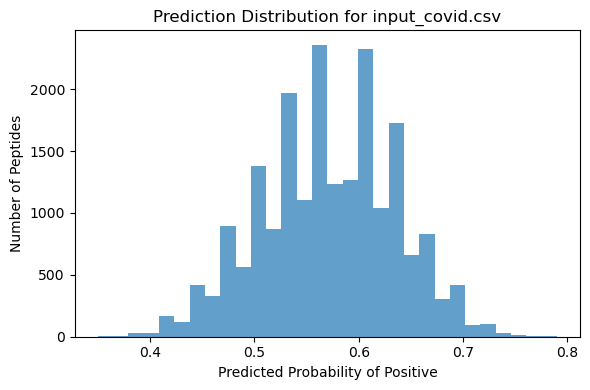

In [ ]:
#RF
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# File paths
bcell_path = "/Users/bodapati/Documents/epitope dataset/input_bcell.csv"
covid_path = "/Users/bodapati/Documents/epitope dataset/input_covid.csv"

# Load data
df = pd.read_csv(bcell_path)

# Features and target
feature_cols = [
    "chou_fasman", "emini", "kolaskar_tongaonkar", "parker",
    "isoelectric_point", "aromaticity", "hydrophobicity", "stability"
]
X = df[feature_cols].values
y = df["target"].values

# Train/Test Split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train class distribution:", np.bincount(y_train))
print("Test class distribution:", np.bincount(y_test))

# Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print("\nAccuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("ROC AUC: {:.4f}".format(roc_auc_score(y_test, y_prob)))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.tight_layout()
plt.show()

# Predict on COVID data
df_covid = pd.read_csv(covid_path)
X_covid = df_covid[feature_cols].values
covid_prob = clf.predict_proba(X_covid)[:, 1]
covid_pred = (covid_prob > 0.5).astype(int)

print("\nFirst 10 predictions for input_covid.csv:")
for i, (prob, label) in enumerate(zip(covid_prob[:10], covid_pred[:10])):
    print(f"Row {i+1}: Probability of Positive = {prob:.3f}, Predicted Label = {label}")

# Plot histogram of COVID predictions
plt.figure(figsize=(6,4))
plt.hist(covid_prob, bins=30, alpha=0.7)
plt.xlabel('Predicted Probability of Positive')
plt.ylabel('Number of Peptides')
plt.title('Prediction Distribution for input_covid.csv')
plt.tight_layout()
plt.show()

Train class distribution: [8388 3121]
Test class distribution: [2097  781]


  0%|          | 0/29 [00:00<?, ?it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.7699791521890201, 'Balanced Accuracy': 0.6296196566401486, 'ROC AUC': 0.6296196566401487, 'F1 Score': 0.7408414761659053, 'Time taken': 0.6010308265686035}
{'Model': 'BaggingClassifier', 'Accuracy': 0.8328700486448923, 'Balanced Accuracy': 0.7611657284932991, 'ROC AUC': 0.7611657284932991, 'F1 Score': 0.8274794447575038, 'Time taken': 0.6838297843933105}
{'Model': 'BernoulliNB', 'Accuracy': 0.7261987491313412, 'Balanced Accuracy': 0.5148034781716702, 'ROC AUC': 0.5148034781716702, 'F1 Score': 0.6366967954078167, 'Time taken': 0.03182840347290039}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.7307157748436414, 'Balanced Accuracy': 0.5142872233182334, 'ROC AUC': 0.5142872233182334, 'F1 Score': 0.6344871528113916, 'Time taken': 0.09980154037475586}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.7779708130646282, 'Balanced Accuracy': 0.7194751724462176, 'ROC AUC': 0.7194751724462176, 'F1 Score': 0.7780153635029131, 'Time taken': 0.113519

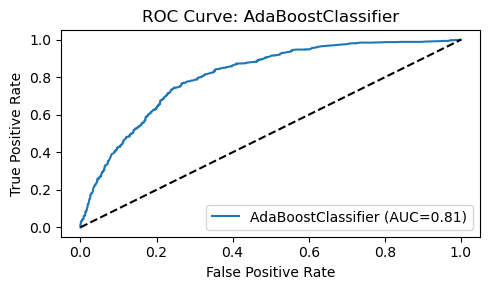


Classification Report for AdaBoostClassifier:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86      2097
           1       0.65      0.32      0.43       781

    accuracy                           0.77      2878
   macro avg       0.72      0.63      0.64      2878
weighted avg       0.75      0.77      0.74      2878



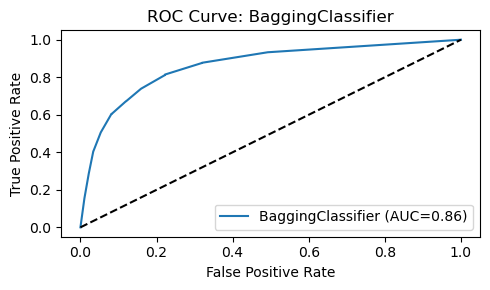


Classification Report for BaggingClassifier:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      2097
           1       0.73      0.60      0.66       781

    accuracy                           0.83      2878
   macro avg       0.80      0.76      0.78      2878
weighted avg       0.83      0.83      0.83      2878



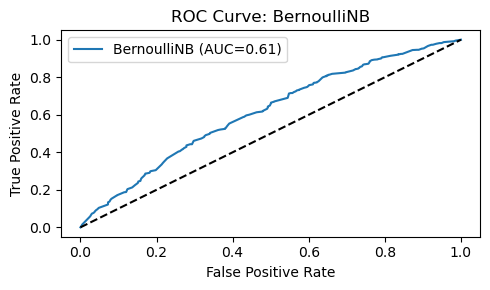


Classification Report for BernoulliNB:
               precision    recall  f1-score   support

           0       0.73      0.98      0.84      2097
           1       0.46      0.05      0.09       781

    accuracy                           0.73      2878
   macro avg       0.60      0.51      0.47      2878
weighted avg       0.66      0.73      0.64      2878



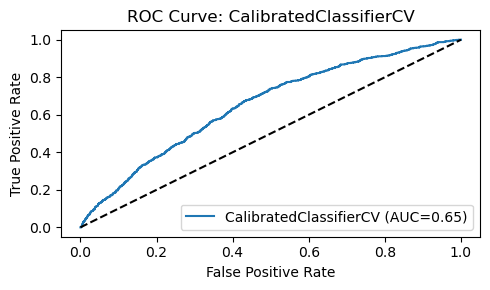


Classification Report for CalibratedClassifierCV:
               precision    recall  f1-score   support

           0       0.73      0.99      0.84      2097
           1       0.55      0.04      0.08       781

    accuracy                           0.73      2878
   macro avg       0.64      0.51      0.46      2878
weighted avg       0.68      0.73      0.63      2878



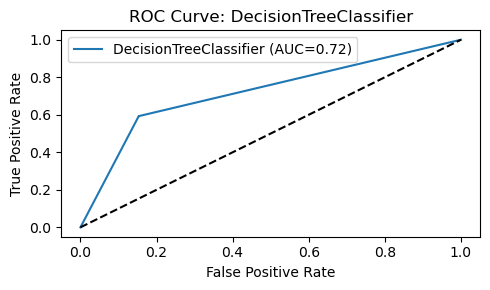


Classification Report for DecisionTreeClassifier:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      2097
           1       0.59      0.59      0.59       781

    accuracy                           0.78      2878
   macro avg       0.72      0.72      0.72      2878
weighted avg       0.78      0.78      0.78      2878



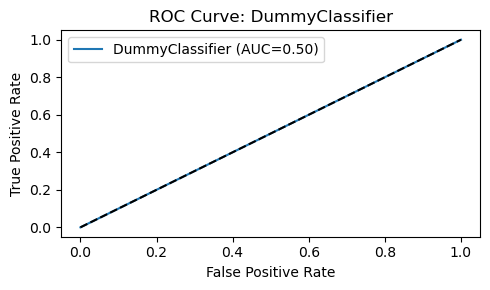


Classification Report for DummyClassifier:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84      2097
           1       0.00      0.00      0.00       781

    accuracy                           0.73      2878
   macro avg       0.36      0.50      0.42      2878
weighted avg       0.53      0.73      0.61      2878



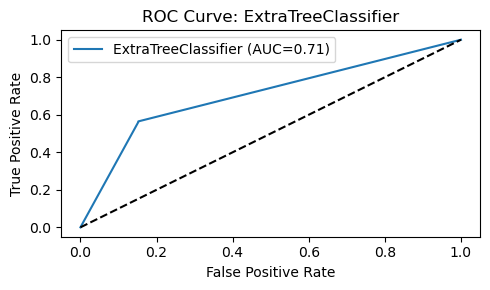


Classification Report for ExtraTreeClassifier:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      2097
           1       0.58      0.56      0.57       781

    accuracy                           0.77      2878
   macro avg       0.71      0.70      0.71      2878
weighted avg       0.77      0.77      0.77      2878



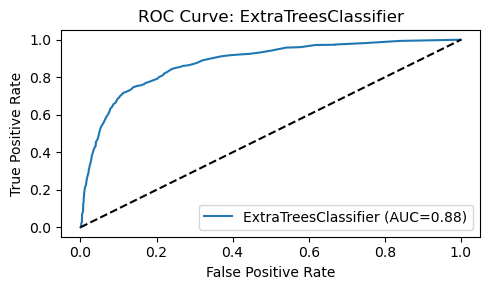


Classification Report for ExtraTreesClassifier:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90      2097
           1       0.75      0.63      0.69       781

    accuracy                           0.84      2878
   macro avg       0.81      0.78      0.79      2878
weighted avg       0.84      0.84      0.84      2878



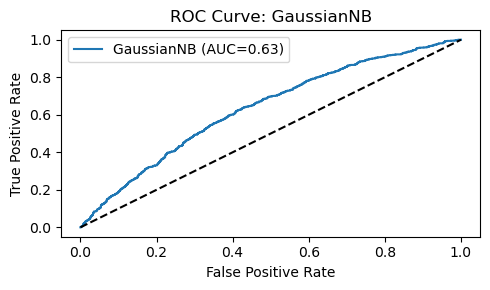


Classification Report for GaussianNB:
               precision    recall  f1-score   support

           0       0.74      0.97      0.84      2097
           1       0.46      0.08      0.14       781

    accuracy                           0.73      2878
   macro avg       0.60      0.52      0.49      2878
weighted avg       0.66      0.73      0.65      2878



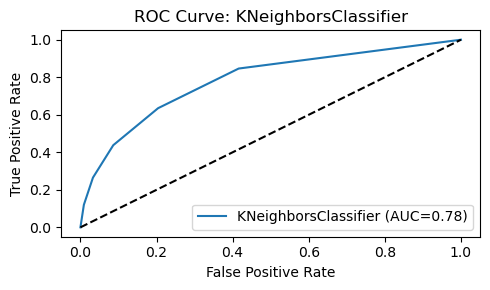


Classification Report for KNeighborsClassifier:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      2097
           1       0.65      0.44      0.52       781

    accuracy                           0.78      2878
   macro avg       0.73      0.68      0.69      2878
weighted avg       0.77      0.78      0.77      2878



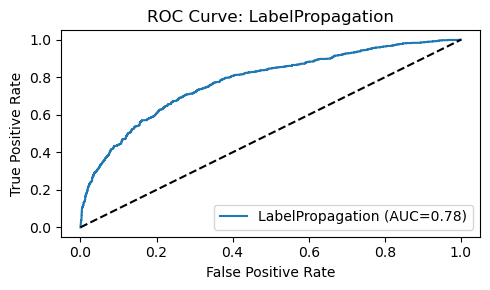


Classification Report for LabelPropagation:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      2097
           1       0.59      0.50      0.55       781

    accuracy                           0.77      2878
   macro avg       0.71      0.69      0.70      2878
weighted avg       0.76      0.77      0.77      2878



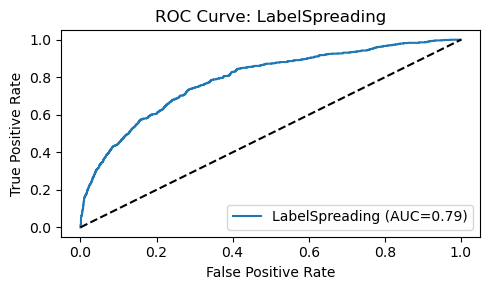


Classification Report for LabelSpreading:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      2097
           1       0.60      0.50      0.54       781

    accuracy                           0.77      2878
   macro avg       0.71      0.69      0.70      2878
weighted avg       0.76      0.77      0.77      2878



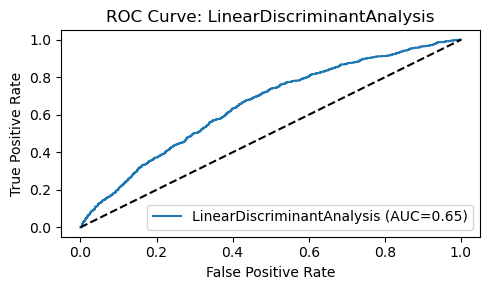


Classification Report for LinearDiscriminantAnalysis:
               precision    recall  f1-score   support

           0       0.73      0.99      0.84      2097
           1       0.55      0.04      0.08       781

    accuracy                           0.73      2878
   macro avg       0.64      0.51      0.46      2878
weighted avg       0.68      0.73      0.63      2878


Classification Report for LinearSVC:
               precision    recall  f1-score   support

           0       0.73      0.99      0.84      2097
           1       0.52      0.02      0.03       781

    accuracy                           0.73      2878
   macro avg       0.62      0.51      0.44      2878
weighted avg       0.67      0.73      0.62      2878



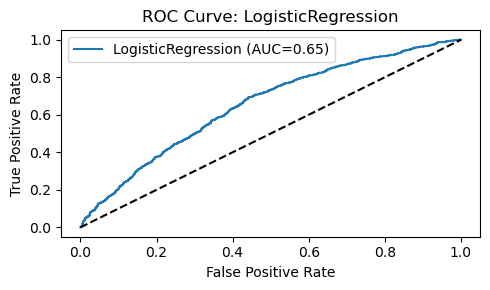


Classification Report for LogisticRegression:
               precision    recall  f1-score   support

           0       0.74      0.99      0.84      2097
           1       0.57      0.04      0.08       781

    accuracy                           0.73      2878
   macro avg       0.65      0.52      0.46      2878
weighted avg       0.69      0.73      0.64      2878


Classification Report for NearestCentroid:
               precision    recall  f1-score   support

           0       0.80      0.58      0.67      2097
           1       0.35      0.60      0.44       781

    accuracy                           0.59      2878
   macro avg       0.57      0.59      0.56      2878
weighted avg       0.68      0.59      0.61      2878


Classification Report for NuSVC:
               precision    recall  f1-score   support

           0       0.78      0.97      0.86      2097
           1       0.76      0.25      0.37       781

    accuracy                           0.77      2878


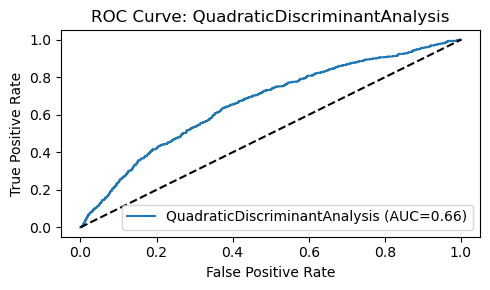


Classification Report for QuadraticDiscriminantAnalysis:
               precision    recall  f1-score   support

           0       0.74      0.96      0.84      2097
           1       0.48      0.11      0.18       781

    accuracy                           0.73      2878
   macro avg       0.61      0.53      0.51      2878
weighted avg       0.67      0.73      0.66      2878



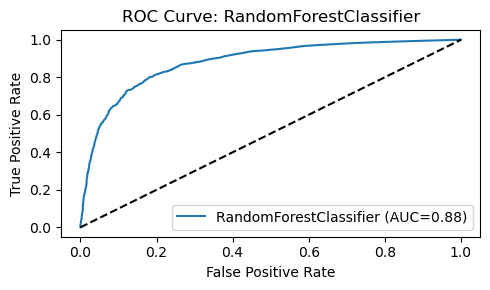


Classification Report for RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      2097
           1       0.76      0.62      0.68       781

    accuracy                           0.84      2878
   macro avg       0.81      0.77      0.79      2878
weighted avg       0.84      0.84      0.84      2878


Classification Report for RidgeClassifier:
               precision    recall  f1-score   support

           0       0.73      0.99      0.84      2097
           1       0.52      0.02      0.03       781

    accuracy                           0.73      2878
   macro avg       0.62      0.51      0.44      2878
weighted avg       0.67      0.73      0.62      2878


Classification Report for RidgeClassifierCV:
               precision    recall  f1-score   support

           0       0.73      0.99      0.84      2097
           1       0.52      0.02      0.03       781

    accuracy                          

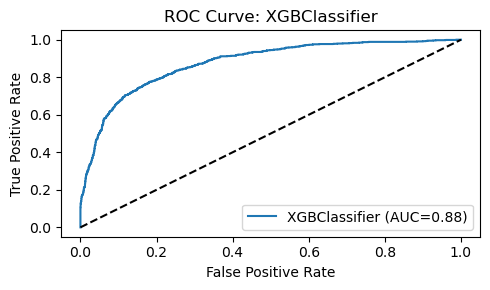


Classification Report for XGBClassifier:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      2097
           1       0.75      0.61      0.68       781

    accuracy                           0.84      2878
   macro avg       0.81      0.77      0.78      2878
weighted avg       0.83      0.84      0.83      2878



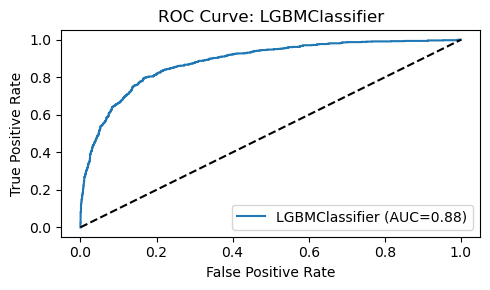


Classification Report for LGBMClassifier:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89      2097
           1       0.76      0.58      0.66       781

    accuracy                           0.84      2878
   macro avg       0.81      0.76      0.78      2878
weighted avg       0.83      0.84      0.83      2878


Final Results Summary:
                            Model  Accuracy  F1-score  ROC AUC
7            ExtraTreesClassifier      0.84      0.69     0.88
20         RandomForestClassifier      0.84      0.68     0.88
25                  XGBClassifier      0.84      0.68     0.88
26                 LGBMClassifier      0.84      0.66     0.88
1               BaggingClassifier      0.83      0.66     0.86
9            KNeighborsClassifier      0.78      0.52     0.78
4          DecisionTreeClassifier      0.78      0.59     0.72
16                          NuSVC      0.77      0.37      NaN
11                 LabelSpreading     

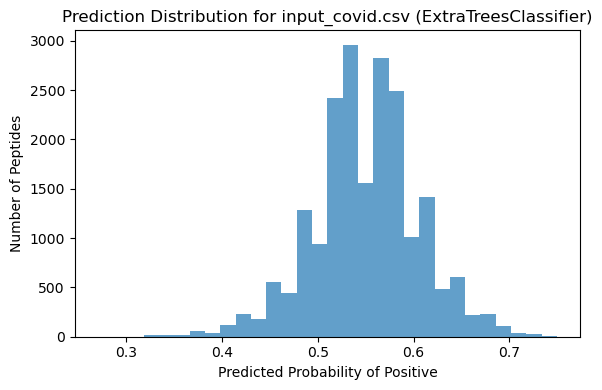

In [ ]:
# ==========================
# Epitope Prediction with LazyPredictor
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import (
    roc_auc_score, classification_report, roc_curve, accuracy_score, f1_score
)

# --------------------------
# File paths
# --------------------------
bcell_path = "/Users/bodapati/Documents/epitope dataset/input_bcell.csv"
covid_path = "/Users/bodapati/Documents/epitope dataset/input_covid.csv"
# --------------------------
# Load data
# --------------------------
df = pd.read_csv(bcell_path)

# Features and target
feature_cols = [
    "chou_fasman", "emini", "kolaskar_tongaonkar", "parker",
    "isoelectric_point", "aromaticity", "hydrophobicity", "stability"
]
X = df[feature_cols].values
y = df["target"].values

# Train/Test Split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train class distribution:", np.bincount(y_train))
print("Test class distribution:", np.bincount(y_test))

# --------------------------
# Run LazyClassifier
# --------------------------
clf = LazyClassifier(verbose=1, ignore_warnings=True, custom_metric=None)
models, _ = clf.fit(X_train, X_test, y_train, y_test)

print("\nLazyPredictor summary:")
print(models)

# --------------------------
# Evaluate each model properly
# --------------------------
results = []

for model_name, model in clf.models.items():
    try:
        # Predict labels
        y_pred = model.predict(X_test)

        # Accuracy & F1
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # ROC AUC if probability estimates exist
        auc = None
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_prob)

            # ROC Curve
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            plt.figure(figsize=(5, 3))
            plt.plot(fpr, tpr, label=f"{model_name} (AUC={auc:.2f})")
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve: {model_name}')
            plt.legend()
            plt.tight_layout()
            plt.show()

        # Print classification report
        print(f"\nClassification Report for {model_name}:\n",
              classification_report(y_test, y_pred))

        # Save results
        results.append([model_name, acc, f1, auc])

    except Exception as e:
        print(f"\nCould not evaluate {model_name}: {e}")

# --------------------------
# Create results summary table
# --------------------------
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1-score", "ROC AUC"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)
print("\nFinal Results Summary:")
print(results_df)

# --------------------------
# Optional: Predict on COVID data with the best model
# --------------------------
best_model_name = results_df.iloc[0]["Model"]
best_model = clf.models[best_model_name]
df_covid = pd.read_csv(covid_path)
X_covid = df_covid[feature_cols].values

if hasattr(best_model, "predict_proba"):
    covid_prob = best_model.predict_proba(X_covid)[:, 1]
    covid_pred = (covid_prob > 0.5).astype(int)

    print(f"\nFirst 10 predictions for input_covid.csv (using {best_model_name}):")
    for i, (prob, label) in enumerate(zip(covid_prob[:10], covid_pred[:10])):
        print(f"Row {i+1}: Probability of Positive = {prob:.3f}, Predicted Label = {label}")

    plt.figure(figsize=(6, 4))
    plt.hist(covid_prob, bins=30, alpha=0.7)
    plt.xlabel('Predicted Probability of Positive')
    plt.ylabel('Number of Peptides')
    plt.title(f'Prediction Distribution for input_covid.csv ({best_model_name})')
    plt.tight_layout()
    plt.show()

else:
    covid_pred = best_model.predict(X_covid)
    print(f"\nFirst 10 predicted labels for input_covid.csv (using {best_model_name}): {covid_pred[:10]}")


Epoch 0, Loss: 1.1999
Epoch 10, Loss: 0.6233
Epoch 20, Loss: 0.5735
Epoch 30, Loss: 0.5777
Epoch 40, Loss: 0.5681
Epoch 50, Loss: 0.5679
Epoch 60, Loss: 0.5668
Epoch 70, Loss: 0.5661
Epoch 80, Loss: 0.5657
Epoch 90, Loss: 0.5652

--- Test Results on BCELL Set ---
Accuracy: 0.7255
ROC AUC: 0.6298

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.99      0.84      2097
           1       0.40      0.02      0.05       781

    accuracy                           0.73      2878
   macro avg       0.57      0.51      0.44      2878
weighted avg       0.64      0.73      0.62      2878



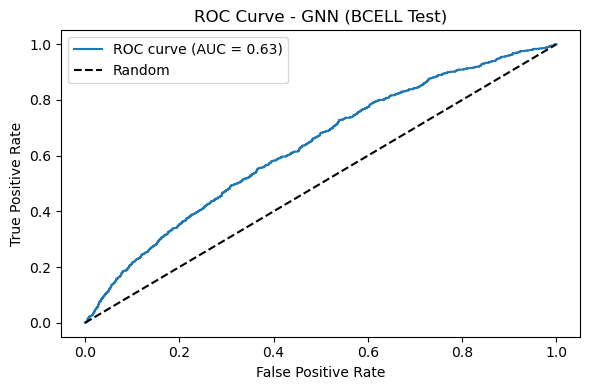


--- Predicted labels for \input_covid.csv (first 20 shown) ---
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

--- First 10 predicted probabilities & labels for \input_covid.csv ---
Row 1: Probability of Positive = 0.251, Predicted Label = 0
Row 2: Probability of Positive = 0.217, Predicted Label = 0
Row 3: Probability of Positive = 0.308, Predicted Label = 0
Row 4: Probability of Positive = 0.286, Predicted Label = 0
Row 5: Probability of Positive = 0.299, Predicted Label = 0
Row 6: Probability of Positive = 0.300, Predicted Label = 0
Row 7: Probability of Positive = 0.292, Predicted Label = 0
Row 8: Probability of Positive = 0.264, Predicted Label = 0
Row 9: Probability of Positive = 0.212, Predicted Label = 0
Row 10: Probability of Positive = 0.261, Predicted Label = 0


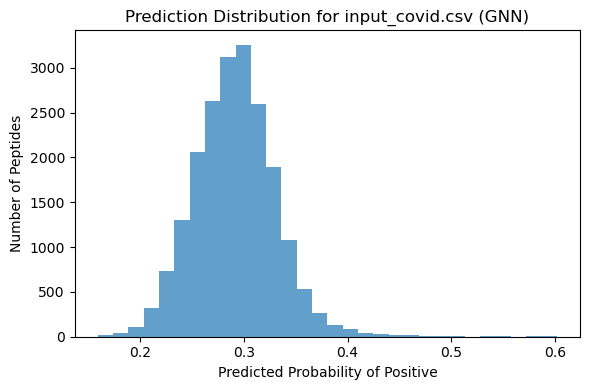


--- Predicted labels for \input_sars.csv (first 20 shown) ---
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy on input_sars.csv: 0.7462

--- First 10 predicted probabilities & labels for \input_sars.csv ---
Row 1: Probability of Positive = 0.321, Predicted Label = 0
Row 2: Probability of Positive = 0.309, Predicted Label = 0
Row 3: Probability of Positive = 0.294, Predicted Label = 0
Row 4: Probability of Positive = 0.303, Predicted Label = 0
Row 5: Probability of Positive = 0.296, Predicted Label = 0
Row 6: Probability of Positive = 0.313, Predicted Label = 0
Row 7: Probability of Positive = 0.344, Predicted Label = 0
Row 8: Probability of Positive = 0.366, Predicted Label = 0
Row 9: Probability of Positive = 0.332, Predicted Label = 0
Row 10: Probability of Positive = 0.334, Predicted Label = 0


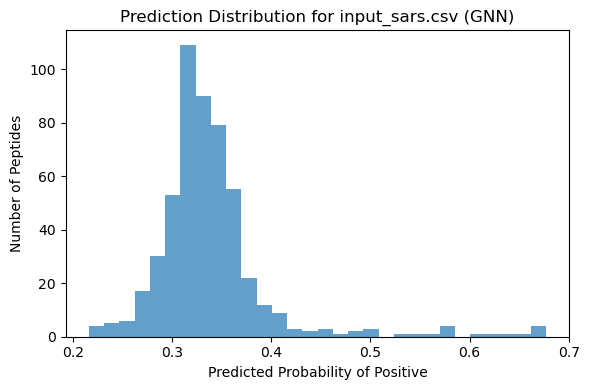

In [ ]:
#GCN Model

import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Updated file paths
bcell_path = "/Users/bodapati/Documents/epitope dataset/input_bcell.csv"
covid_path = "/Users/bodapati/Documents/epitope dataset/input_covid.csv"
sars_path  = "/Users/bodapati/Documents/epitope dataset/input_sars.csv"

# Feature columns
feature_cols = [
    "chou_fasman", "emini", "kolaskar_tongaonkar", "parker",
    "isoelectric_point", "aromaticity", "hydrophobicity", "stability"
]

# --- Train/Test on BCELL data ---
df = pd.read_csv(bcell_path)
X = df[feature_cols].values
y = df["target"].values

# Build kNN graph for bcell data
k = 5
knn = NearestNeighbors(n_neighbors=k+1)
knn.fit(X)
_, indices = knn.kneighbors(X)
edge_index = []
for i, neighbors in enumerate(indices):
    for j in neighbors[1:]:
        edge_index.append([i, j])
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

# Train/test split
idx_train, idx_test = train_test_split(np.arange(len(y)), test_size=0.2, stratify=y, random_state=42)
mask_train = torch.zeros(len(y), dtype=torch.bool); mask_train[idx_train] = True
mask_test = torch.zeros(len(y), dtype=torch.bool); mask_test[idx_test] = True

data = Data(
    x=torch.tensor(X, dtype=torch.float),
    edge_index=edge_index,
    y=torch.tensor(y, dtype=torch.long),
    train_mask=mask_train,
    test_mask=mask_test
)

# Simple GCN Model
class GNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

model = GNN(data.x.shape[1], 16, 2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation
model.eval()
out = model(data.x, data.edge_index)
pred = out.argmax(dim=1)
y_true = data.y[data.test_mask].numpy()
y_pred = pred[data.test_mask].numpy()
y_scores = F.softmax(out[data.test_mask], dim=1)[:, 1].detach().numpy()

print("\n--- Test Results on BCELL Set ---")
print("Accuracy: {:.4f}".format(accuracy_score(y_true, y_pred)))
print("ROC AUC: {:.4f}".format(roc_auc_score(y_true, y_scores)))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_score(y_true, y_scores):.2f})")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - GNN (BCELL Test)")
plt.legend()
plt.tight_layout()
plt.show()

# Prediction function for new datasets, print accuracy if available, all first 20 predictions, and plot
def predict_and_plot(model, input_path, feature_cols, k=5, title='Dataset'):
    df_infer = pd.read_csv(input_path)
    X_infer = df_infer[feature_cols].values

    # Build kNN graph for this dataset
    knn_infer = NearestNeighbors(n_neighbors=min(k+1, len(X_infer)))
    knn_infer.fit(X_infer)
    _, indices_infer = knn_infer.kneighbors(X_infer)
    edge_index_infer = []
    for i, neighbors in enumerate(indices_infer):
        for j in neighbors[1:]:
            edge_index_infer.append([i, j])
    edge_index_infer = torch.tensor(edge_index_infer, dtype=torch.long).t().contiguous()

    # Model prediction
    X_tensor = torch.tensor(X_infer, dtype=torch.float)
    model.eval()
    out_infer = model(X_tensor, edge_index_infer)
    probs = F.softmax(out_infer, dim=1)[:, 1].detach().numpy()
    preds = (probs > 0.5).astype(int)

    # Print all predicted labels (show first 20 for readability)
    print(f"\n--- Predicted labels for {input_path.split('covid_19')[-1]} (first 20 shown) ---")
    print(preds[:20])

    # Print accuracy if available
    if 'target' in df_infer.columns:
        acc = accuracy_score(df_infer['target'].values, preds)
        print(f"Accuracy on {title}: {acc:.4f}")

    # Print first 10 probabilities and labels as usual
    print(f"\n--- First 10 predicted probabilities & labels for {input_path.split('covid_19')[-1]} ---")
    for i, (prob, label) in enumerate(zip(probs[:10], preds[:10])):
        print(f"Row {i+1}: Probability of Positive = {prob:.3f}, Predicted Label = {label}")

    # Plot
    plt.figure(figsize=(6,4))
    plt.hist(probs, bins=30, alpha=0.7)
    plt.xlabel('Predicted Probability of Positive')
    plt.ylabel('Number of Peptides')
    plt.title(f'Prediction Distribution for {title} (GNN)')
    plt.tight_layout()
    plt.show()

# Predict and show for COVID and SARS (each builds own kNN graph)
predict_and_plot(model, covid_path, feature_cols, k=k, title='input_covid.csv')
predict_and_plot(model, sars_path,  feature_cols, k=k, title='input_sars.csv')


Epoch 0, Loss: 0.5539
Epoch 10, Loss: 0.4954
Epoch 20, Loss: 0.4082
Epoch 30, Loss: 0.5110
Epoch 40, Loss: 0.5771
Epoch 50, Loss: 0.5463
Epoch 60, Loss: 0.4838
Epoch 70, Loss: 0.5255
Epoch 80, Loss: 0.4874
Epoch 90, Loss: 0.4121

--- Test Results on BCELL Set (CNN) ---
Accuracy: 0.7662
ROC AUC: 0.7688

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85      2097
           1       0.62      0.37      0.46       781

    accuracy                           0.77      2878
   macro avg       0.71      0.64      0.66      2878
weighted avg       0.75      0.77      0.74      2878



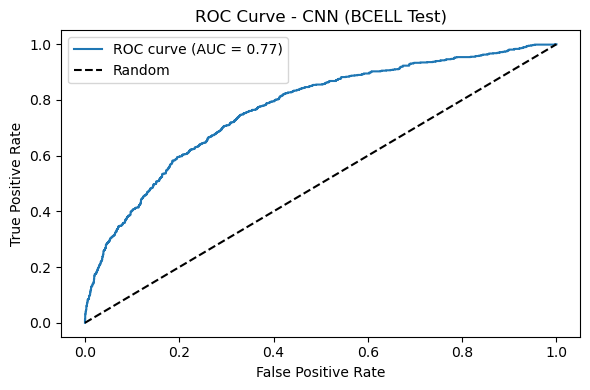


--- Predicted labels for \input_covid.csv (first 20 shown) ---
[1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0]

--- First 10 predicted probabilities & labels for \input_covid.csv ---
Row 1: Probability of Positive = 0.572, Predicted Label = 1
Row 2: Probability of Positive = 0.527, Predicted Label = 1
Row 3: Probability of Positive = 0.450, Predicted Label = 0
Row 4: Probability of Positive = 0.500, Predicted Label = 0
Row 5: Probability of Positive = 0.466, Predicted Label = 0
Row 6: Probability of Positive = 0.466, Predicted Label = 0
Row 7: Probability of Positive = 0.446, Predicted Label = 0
Row 8: Probability of Positive = 0.553, Predicted Label = 1
Row 9: Probability of Positive = 0.607, Predicted Label = 1
Row 10: Probability of Positive = 0.470, Predicted Label = 0


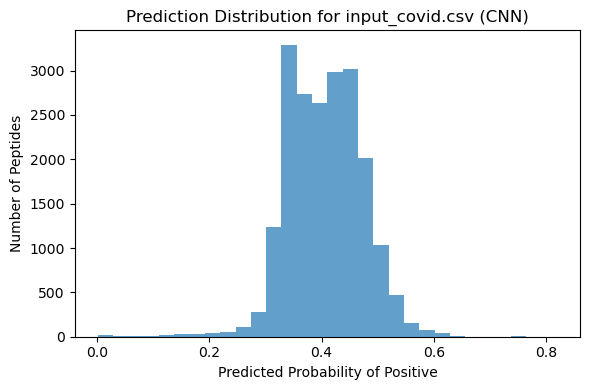


--- Predicted labels for \input_sars.csv (first 20 shown) ---
[1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1]
Accuracy on input_sars.csv: 0.5596

--- First 10 predicted probabilities & labels for \input_sars.csv ---
Row 1: Probability of Positive = 0.575, Predicted Label = 1
Row 2: Probability of Positive = 0.674, Predicted Label = 1
Row 3: Probability of Positive = 0.002, Predicted Label = 0
Row 4: Probability of Positive = 0.506, Predicted Label = 1
Row 5: Probability of Positive = 0.363, Predicted Label = 0
Row 6: Probability of Positive = 0.333, Predicted Label = 0
Row 7: Probability of Positive = 0.486, Predicted Label = 0
Row 8: Probability of Positive = 0.534, Predicted Label = 1
Row 9: Probability of Positive = 0.579, Predicted Label = 1
Row 10: Probability of Positive = 0.528, Predicted Label = 1


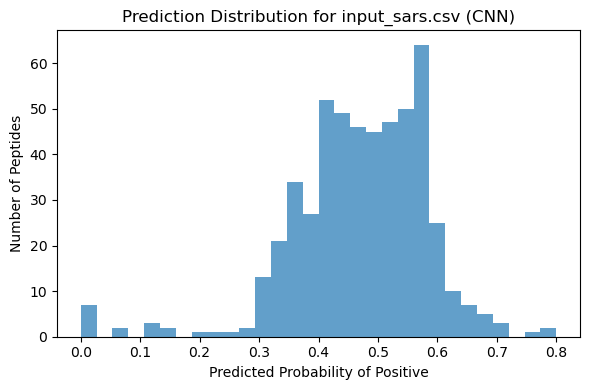

In [ ]:
#cnn


import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Updated file paths
bcell_path = "/Users/bodapati/Documents/epitope dataset/input_bcell.csv"
covid_path = "/Users/bodapati/Documents/epitope dataset/input_covid.csv"
sars_path  = "/Users/bodapati/Documents/epitope dataset/input_sars.csv"

# Feature columns
feature_cols = [
    "chou_fasman", "emini", "kolaskar_tongaonkar", "parker",
    "isoelectric_point", "aromaticity", "hydrophobicity", "stability"
]

# --- Train/Test on BCELL data ---
df = pd.read_csv(bcell_path)
X = df[feature_cols].values
y = df["target"].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Convert to PyTorch Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Reshape data for 1D CNN: (batch_size, channels, sequence_length)
# Our sequence length is 8 (the number of features) and we have 1 channel.
X_train_tensor = X_train_tensor.unsqueeze(1)
X_test_tensor = X_test_tensor.unsqueeze(1)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


# 1D CNN Model
class CNN1D(nn.Module):
    def __init__(self, num_features, num_classes):
        super(CNN1D, self).__init__()
        # Convolutional layer 1
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2) # Reduces length from 8 to 4
        
        # Convolutional layer 2
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2) # Reduces length from 4 to 2

        # Flatten and fully connected layers
        # Input features to linear layer: 32 channels * 2 length = 64
        self.fc1 = nn.Linear(32 * 2, 64)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = torch.flatten(x, 1) # Flatten all dimensions except batch
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN1D(num_features=len(feature_cols), num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training
for epoch in range(100):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation
model.eval()
y_true = []
y_pred = []
y_scores = []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        scores = F.softmax(outputs, dim=1)[:, 1]
        preds = torch.argmax(outputs, dim=1)
        
        y_true.extend(batch_y.numpy())
        y_pred.extend(preds.numpy())
        y_scores.extend(scores.numpy())

print("\n--- Test Results on BCELL Set (CNN) ---")
print("Accuracy: {:.4f}".format(accuracy_score(y_true, y_pred)))
print("ROC AUC: {:.4f}".format(roc_auc_score(y_true, y_scores)))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_score(y_true, y_scores):.2f})")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CNN (BCELL Test)")
plt.legend()
plt.tight_layout()
plt.show()

# Prediction function for new datasets
def predict_and_plot_cnn(model, input_path, feature_cols, title='Dataset'):
    df_infer = pd.read_csv(input_path)
    X_infer = df_infer[feature_cols].values

    # Convert to tensor and reshape
    X_tensor = torch.tensor(X_infer, dtype=torch.float32).unsqueeze(1)
    
    # Model prediction
    model.eval()
    with torch.no_grad():
        out_infer = model(X_tensor)
        probs = F.softmax(out_infer, dim=1)[:, 1].numpy()
        preds = (probs > 0.5).astype(int)

    # Print all predicted labels (show first 20 for readability)
    print(f"\n--- Predicted labels for {input_path.split('covid_19')[-1]} (first 20 shown) ---")
    print(preds[:20])

    # Print accuracy if available
    if 'target' in df_infer.columns:
        acc = accuracy_score(df_infer['target'].values, preds)
        print(f"Accuracy on {title}: {acc:.4f}")

    # Print first 10 probabilities and labels
    print(f"\n--- First 10 predicted probabilities & labels for {input_path.split('covid_19')[-1]} ---")
    for i, (prob, label) in enumerate(zip(probs[:10], preds[:10])):
        print(f"Row {i+1}: Probability of Positive = {prob:.3f}, Predicted Label = {label}")

    # Plot
    plt.figure(figsize=(6,4))
    plt.hist(probs, bins=30, alpha=0.7)
    plt.xlabel('Predicted Probability of Positive')
    plt.ylabel('Number of Peptides')
    plt.title(f'Prediction Distribution for {title} (CNN)')
    plt.tight_layout()
    plt.show()

# Predict and show for COVID and SARS
predict_and_plot_cnn(model, covid_path, feature_cols, title='input_covid.csv')
predict_and_plot_cnn(model, sars_path,  feature_cols, title='input_sars.csv')

Training AdaBoost model...
Training complete.

--- Test Results on BCELL Set (AdaBoost) ---
Accuracy: 0.7557
ROC AUC: 0.7886

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.95      0.85      2097
           1       0.63      0.24      0.35       781

    accuracy                           0.76      2878
   macro avg       0.70      0.59      0.60      2878
weighted avg       0.73      0.76      0.71      2878



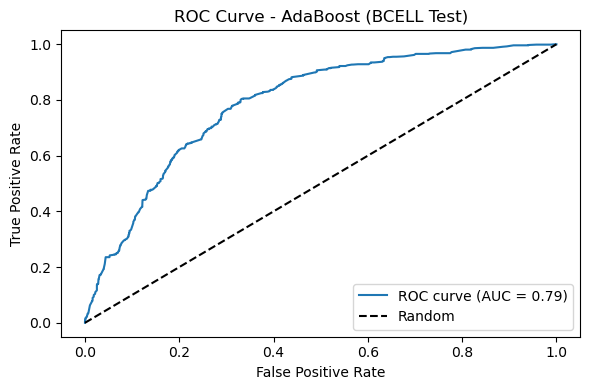


--- Predicted labels for \input_covid.csv (first 20 shown) ---
[1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0]

--- First 10 predicted probabilities & labels for \input_covid.csv ---
Row 1: Probability of Positive = 0.502, Predicted Label = 1
Row 2: Probability of Positive = 0.502, Predicted Label = 1
Row 3: Probability of Positive = 0.528, Predicted Label = 1
Row 4: Probability of Positive = 0.550, Predicted Label = 1
Row 5: Probability of Positive = 0.550, Predicted Label = 1
Row 6: Probability of Positive = 0.550, Predicted Label = 1
Row 7: Probability of Positive = 0.528, Predicted Label = 1
Row 8: Probability of Positive = 0.502, Predicted Label = 1
Row 9: Probability of Positive = 0.494, Predicted Label = 0
Row 10: Probability of Positive = 0.502, Predicted Label = 1


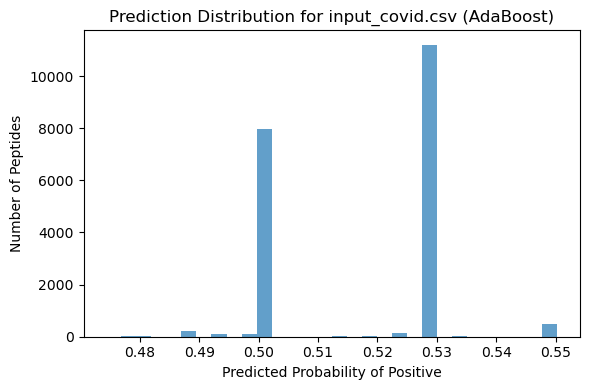


--- Predicted labels for \input_sars.csv (first 20 shown) ---
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy on input_sars.csv: 0.7288

--- First 10 predicted probabilities & labels for \input_sars.csv ---
Row 1: Probability of Positive = 0.474, Predicted Label = 0
Row 2: Probability of Positive = 0.474, Predicted Label = 0
Row 3: Probability of Positive = 0.452, Predicted Label = 0
Row 4: Probability of Positive = 0.474, Predicted Label = 0
Row 5: Probability of Positive = 0.500, Predicted Label = 0
Row 6: Probability of Positive = 0.500, Predicted Label = 0
Row 7: Probability of Positive = 0.500, Predicted Label = 0
Row 8: Probability of Positive = 0.500, Predicted Label = 0
Row 9: Probability of Positive = 0.500, Predicted Label = 0
Row 10: Probability of Positive = 0.500, Predicted Label = 0


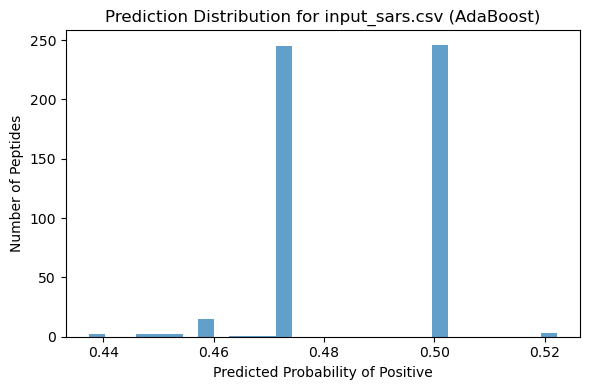

In [ ]:
#adaboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Updated file paths
bcell_path = "/Users/bodapati/Documents/epitope dataset/input_bcell.csv"
covid_path = "/Users/bodapati/Documents/epitope dataset/input_covid.csv"
sars_path  = "/Users/bodapati/Documents/epitope dataset/input_sars.csv"


# Feature columns
feature_cols = [
    "chou_fasman", "emini", "kolaskar_tongaonkar", "parker",
    "isoelectric_point", "aromaticity", "hydrophobicity", "stability"
]

# --- Train/Test on BCELL data ---
df = pd.read_csv(bcell_path)
X = df[feature_cols].values
y = df["target"].values

# Train/test split (standard scikit-learn workflow)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# --- Define and Train the AdaBoost Model ---

# 1. Define the base estimator (the "weak learner")
# A decision tree with depth 1 (a "decision stump") is a classic choice.
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# 2. Define the AdaBoost classifier
# It will create 100 decision stumps sequentially.
model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,
    random_state=42
)

# 3. Train the model with a single line of code
print("Training AdaBoost model...")
model.fit(X_train, y_train)
print("Training complete.")

# --- Evaluation ---
y_pred = model.predict(X_test)
# Get probabilities for ROC AUC score
y_scores = model.predict_proba(X_test)[:, 1]

print("\n--- Test Results on BCELL Set (AdaBoost) ---")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("ROC AUC: {:.4f}".format(roc_auc_score(y_test, y_scores)))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_score(y_test, y_scores):.2f})")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AdaBoost (BCELL Test)")
plt.legend()
plt.tight_layout()
plt.show()

# Prediction function for new datasets
def predict_and_plot_adaboost(model, input_path, feature_cols, title='Dataset'):
    df_infer = pd.read_csv(input_path)
    X_infer = df_infer[feature_cols].values

    # Model prediction
    preds = model.predict(X_infer)
    probs = model.predict_proba(X_infer)[:, 1]

    # Print all predicted labels (show first 20 for readability)
    print(f"\n--- Predicted labels for {input_path.split('covid_19')[-1]} (first 20 shown) ---")
    print(preds[:20])

    # Print accuracy if available
    if 'target' in df_infer.columns:
        acc = accuracy_score(df_infer['target'].values, preds)
        print(f"Accuracy on {title}: {acc:.4f}")

    # Print first 10 probabilities and labels
    print(f"\n--- First 10 predicted probabilities & labels for {input_path.split('covid_19')[-1]} ---")
    for i, (prob, label) in enumerate(zip(probs[:10], preds[:10])):
        print(f"Row {i+1}: Probability of Positive = {prob:.3f}, Predicted Label = {label}")

    # Plot
    plt.figure(figsize=(6,4))
    plt.hist(probs, bins=30, alpha=0.7)
    plt.xlabel('Predicted Probability of Positive')
    plt.ylabel('Number of Peptides')
    plt.title(f'Prediction Distribution for {title} (AdaBoost)')
    plt.tight_layout()
    plt.show()

# Predict and show for COVID and SARS
predict_and_plot_adaboost(model, covid_path, feature_cols, title='input_covid.csv')
predict_and_plot_adaboost(model, sars_path,  feature_cols, title='input_sars.csv')

c:\Users\nagas\anaconda3\Lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 0, Loss: 0.5431
Epoch 10, Loss: 0.5405
Epoch 20, Loss: 0.6286
Epoch 30, Loss: 0.4790
Epoch 40, Loss: 0.6372
Epoch 50, Loss: 0.3870
Epoch 60, Loss: 0.3509
Epoch 70, Loss: 0.4047
Epoch 80, Loss: 0.5947
Epoch 90, Loss: 0.3918

--- Test Results on BCELL Set (CNN+Transformer) ---
Accuracy: 0.7981
ROC AUC: 0.8262

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      2097
           1       0.72      0.43      0.53       781

    accuracy                           0.80      2878
   macro avg       0.76      0.68      0.70      2878
weighted avg       0.79      0.80      0.78      2878



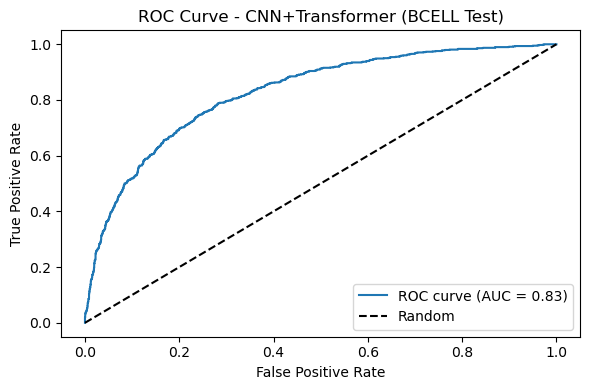


--- Predicted labels for \input_covid.csv (first 20 shown) ---
[1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0]

--- First 10 predicted probabilities & labels for \input_covid.csv ---
Row 1: Probability of Positive = 0.626, Predicted Label = 1
Row 2: Probability of Positive = 0.449, Predicted Label = 0
Row 3: Probability of Positive = 0.633, Predicted Label = 1
Row 4: Probability of Positive = 0.402, Predicted Label = 0
Row 5: Probability of Positive = 0.365, Predicted Label = 0
Row 6: Probability of Positive = 0.365, Predicted Label = 0
Row 7: Probability of Positive = 0.290, Predicted Label = 0
Row 8: Probability of Positive = 0.449, Predicted Label = 0
Row 9: Probability of Positive = 0.561, Predicted Label = 1
Row 10: Probability of Positive = 0.572, Predicted Label = 1


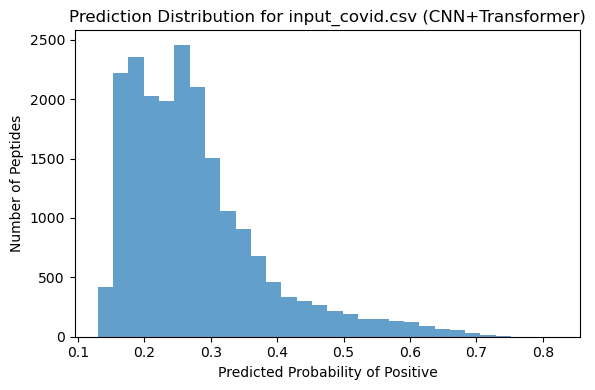


--- Predicted labels for \input_sars.csv (first 20 shown) ---
[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy on input_sars.csv: 0.7077

--- First 10 predicted probabilities & labels for \input_sars.csv ---
Row 1: Probability of Positive = 0.598, Predicted Label = 1
Row 2: Probability of Positive = 0.635, Predicted Label = 1
Row 3: Probability of Positive = 0.126, Predicted Label = 0
Row 4: Probability of Positive = 0.302, Predicted Label = 0
Row 5: Probability of Positive = 0.325, Predicted Label = 0
Row 6: Probability of Positive = 0.320, Predicted Label = 0
Row 7: Probability of Positive = 0.354, Predicted Label = 0
Row 8: Probability of Positive = 0.261, Predicted Label = 0
Row 9: Probability of Positive = 0.296, Predicted Label = 0
Row 10: Probability of Positive = 0.291, Predicted Label = 0


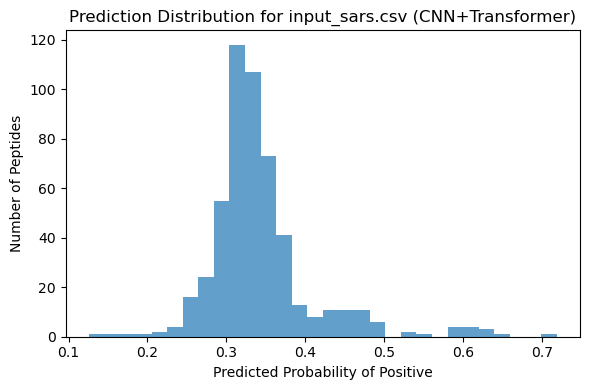

In [ ]:
#transformer and cnn hybrid model

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import math

# Updated file paths
bcell_path = "/Users/bodapati/Documents/epitope dataset/input_bcell.csv"
covid_path = "/Users/bodapati/Documents/epitope dataset/input_covid.csv"
sars_path  = "/Users/bodapati/Documents/epitope dataset/input_sars.csv"

# Feature columns
feature_cols = [
    "chou_fasman", "emini", "kolaskar_tongaonkar", "parker",
    "isoelectric_point", "aromaticity", "hydrophobicity", "stability"
]

# --- Data Loading and Preparation (same as CNN) ---
df = pd.read_csv(bcell_path)
X = df[feature_cols].values
y = df["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1) # Add channel dim
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)  # Add channel dim
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# --- Model Architecture ---

# Helper module for Positional Encoding
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:x.size(0), :]

class CNNTransformer(nn.Module):
    def __init__(self, num_features, num_classes, embed_dim=32, nhead=4, num_layers=2, dim_feedforward=128):
        super(CNNTransformer, self).__init__()
        
        # 1. CNN Feature Extractor
        self.cnn_extractor = nn.Conv1d(in_channels=1, out_channels=embed_dim, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        
        # 2. Positional Encoding
        self.pos_encoder = PositionalEncoding(d_model=embed_dim)
        
        # 3. Transformer Encoder
        encoder_layers = nn.TransformerEncoderLayer(
            d_model=embed_dim, 
            nhead=nhead, 
            dim_feedforward=dim_feedforward,
            batch_first=False # PyTorch default expects (seq, batch, feature)
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=num_layers)
        
        # 4. Final Classifier Head
        self.classifier = nn.Linear(embed_dim, num_classes)
        
    def forward(self, x):
        # x shape: (batch_size, channels=1, seq_len=8)
        
        # Pass through CNN
        x = self.cnn_extractor(x) # -> (batch, embed_dim, seq_len)
        x = self.relu(x)
        
        # Reshape for Transformer
        # Transformer expects (seq_len, batch_size, embed_dim)
        x = x.permute(2, 0, 1) # -> (seq_len, batch, embed_dim)
        
        # Add positional encoding
        x = self.pos_encoder(x)
        
        # Pass through Transformer
        x = self.transformer_encoder(x) # -> (seq_len, batch, embed_dim)
        
        # Aggregate the sequence output (e.g., by averaging)
        x = x.mean(dim=0) # -> (batch, embed_dim)
        
        # Final classification
        out = self.classifier(x) # -> (batch, num_classes)
        return out

# --- Training and Evaluation ---
model = CNNTransformer(num_features=len(feature_cols), num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training Loop
for epoch in range(100):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation (reusing the same logic as the CNN model)
model.eval()
y_true = []
y_pred = []
y_scores = []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        scores = F.softmax(outputs, dim=1)[:, 1]
        preds = torch.argmax(outputs, dim=1)
        
        y_true.extend(batch_y.numpy())
        y_pred.extend(preds.numpy())
        y_scores.extend(scores.numpy())

print("\n--- Test Results on BCELL Set (CNN+Transformer) ---")
print("Accuracy: {:.4f}".format(accuracy_score(y_true, y_pred)))
print("ROC AUC: {:.4f}".format(roc_auc_score(y_true, y_scores)))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_score(y_true, y_scores):.2f})")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CNN+Transformer (BCELL Test)")
plt.legend()
plt.tight_layout()
plt.show()


# Prediction function (reusable for any PyTorch model with this data shape)
def predict_and_plot_pytorch(model, input_path, feature_cols, title='Dataset'):
    df_infer = pd.read_csv(input_path)
    X_infer = df_infer[feature_cols].values

    # Convert to tensor and reshape for CNN input
    X_tensor = torch.tensor(X_infer, dtype=torch.float32).unsqueeze(1)
    
    model.eval()
    with torch.no_grad():
        out_infer = model(X_tensor)
        probs = F.softmax(out_infer, dim=1)[:, 1].numpy()
        preds = (probs > 0.5).astype(int)

    print(f"\n--- Predicted labels for {input_path.split('covid_19')[-1]} (first 20 shown) ---")
    print(preds[:20])

    if 'target' in df_infer.columns:
        acc = accuracy_score(df_infer['target'].values, preds)
        print(f"Accuracy on {title}: {acc:.4f}")

    print(f"\n--- First 10 predicted probabilities & labels for {input_path.split('covid_19')[-1]} ---")
    for i, (prob, label) in enumerate(zip(probs[:10], preds[:10])):
        print(f"Row {i+1}: Probability of Positive = {prob:.3f}, Predicted Label = {label}")

    plt.figure(figsize=(6,4))
    plt.hist(probs, bins=30, alpha=0.7)
    plt.xlabel('Predicted Probability of Positive')
    plt.ylabel('Number of Peptides')
    plt.title(f'Prediction Distribution for {title} (CNN+Transformer)')
    plt.tight_layout()
    plt.show()

# Predict and show for COVID and SARS
predict_and_plot_pytorch(model, covid_path, feature_cols, title='input_covid.csv')
predict_and_plot_pytorch(model, sars_path,  feature_cols, title='input_sars.csv')

Epoch 0, Loss: 0.5303
Epoch 10, Loss: 0.5404
Epoch 20, Loss: 0.4808
Epoch 30, Loss: 0.5520
Epoch 40, Loss: 0.5655
Epoch 50, Loss: 0.4654
Epoch 60, Loss: 0.5963
Epoch 70, Loss: 0.5461
Epoch 80, Loss: 0.4152
Epoch 90, Loss: 0.5436

--- Test Results on BCELL Set (CNN+LSTM) ---
Accuracy: 0.7571
ROC AUC: 0.7226

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85      2097
           1       0.63      0.26      0.37       781

    accuracy                           0.76      2878
   macro avg       0.70      0.60      0.61      2878
weighted avg       0.73      0.76      0.72      2878



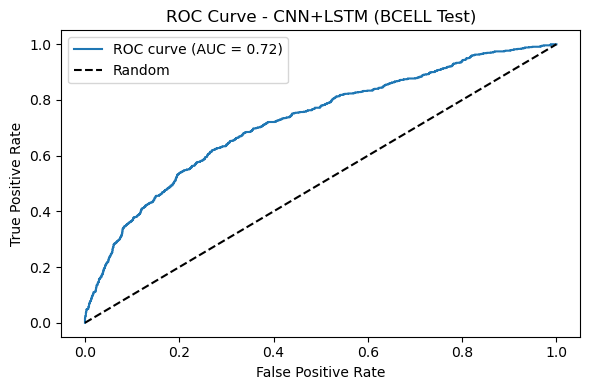


--- Predicted labels for \input_covid.csv (first 20 shown) ---
[1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]

--- First 10 predicted probabilities & labels for \input_covid.csv ---
Row 1: Probability of Positive = 0.504, Predicted Label = 1
Row 2: Probability of Positive = 0.344, Predicted Label = 0
Row 3: Probability of Positive = 0.478, Predicted Label = 0
Row 4: Probability of Positive = 0.283, Predicted Label = 0
Row 5: Probability of Positive = 0.276, Predicted Label = 0
Row 6: Probability of Positive = 0.276, Predicted Label = 0
Row 7: Probability of Positive = 0.299, Predicted Label = 0
Row 8: Probability of Positive = 0.421, Predicted Label = 0
Row 9: Probability of Positive = 0.392, Predicted Label = 0
Row 10: Probability of Positive = 0.540, Predicted Label = 1


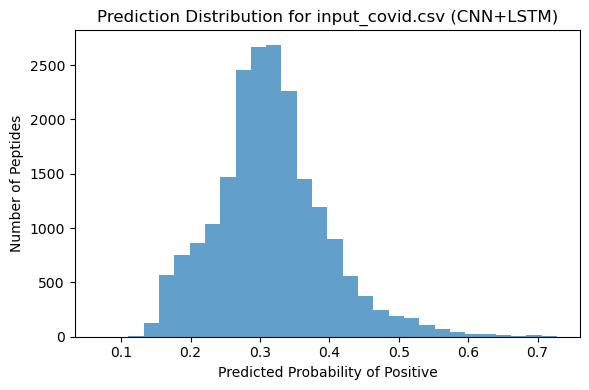


--- Predicted labels for \input_sars.csv (first 20 shown) ---
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy on input_sars.csv: 0.7212

--- First 10 predicted probabilities & labels for \input_sars.csv ---
Row 1: Probability of Positive = 0.242, Predicted Label = 0
Row 2: Probability of Positive = 0.264, Predicted Label = 0
Row 3: Probability of Positive = 0.056, Predicted Label = 0
Row 4: Probability of Positive = 0.231, Predicted Label = 0
Row 5: Probability of Positive = 0.268, Predicted Label = 0
Row 6: Probability of Positive = 0.325, Predicted Label = 0
Row 7: Probability of Positive = 0.314, Predicted Label = 0
Row 8: Probability of Positive = 0.368, Predicted Label = 0
Row 9: Probability of Positive = 0.332, Predicted Label = 0
Row 10: Probability of Positive = 0.335, Predicted Label = 0


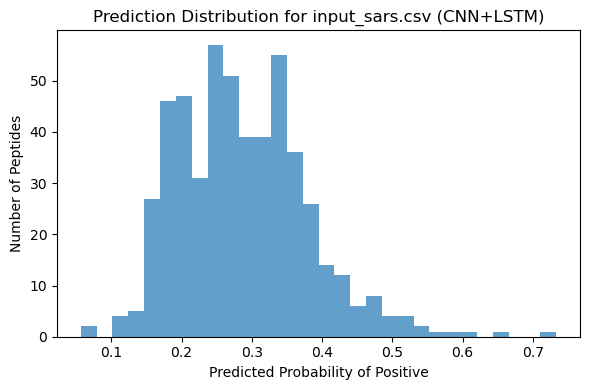

In [ ]:
#cnn and lstm hybrid model

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Updated file paths
bcell_path = "/Users/bodapati/Documents/epitope dataset/input_bcell.csv"
covid_path = "/Users/bodapati/Documents/epitope dataset/input_covid.csv"
sars_path  = "/Users/bodapati/Documents/epitope dataset/input_sars.csv"


# Feature columns
feature_cols = [
    "chou_fasman", "emini", "kolaskar_tongaonkar", "parker",
    "isoelectric_point", "aromaticity", "hydrophobicity", "stability"
]

# --- Data Loading and Preparation (same as other PyTorch models) ---
df = pd.read_csv(bcell_path)
X = df[feature_cols].values
y = df["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1) # Add channel dim
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)  # Add channel dim
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# --- Model Architecture ---

class CNNLSTM(nn.Module):
    def __init__(self, num_features, num_classes, cnn_out_channels=16, lstm_hidden_size=32):
        super(CNNLSTM, self).__init__()
        
        # 1. CNN Feature Extractor
        self.cnn_extractor = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=cnn_out_channels, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2) # Reduces sequence length from 8 to 4
        )
        
        # 2. LSTM Sequence Modeler
        self.lstm = nn.LSTM(
            input_size=cnn_out_channels,  # Input features are the channels from the CNN
            hidden_size=lstm_hidden_size,
            num_layers=1,
            batch_first=True # This makes the input shape (batch, seq, feature)
        )
        
        # 3. Final Classifier Head
        self.classifier = nn.Linear(lstm_hidden_size, num_classes)

    def forward(self, x):
        # x shape: (batch_size, channels=1, seq_len=8)
        
        # Pass through CNN
        x = self.cnn_extractor(x) # -> (batch, cnn_out_channels, new_seq_len=4)
        
        # Reshape for LSTM
        # LSTM with batch_first=True expects (batch, seq_len, features)
        x = x.permute(0, 2, 1) # -> (batch, new_seq_len=4, cnn_out_channels)
        
        # Pass through LSTM
        # We only need the final hidden state, so we ignore the full output sequence (_)
        # and the final cell state (_)
        _, (h_n, _) = self.lstm(x)
        
        # h_n shape is (num_layers, batch, hidden_size). We take the last layer's hidden state.
        # Since num_layers is 1, we just squeeze the first dimension.
        x = h_n.squeeze(0) # -> (batch, hidden_size)
        
        # Final classification
        out = self.classifier(x) # -> (batch, num_classes)
        return out


# --- Training and Evaluation ---
model = CNNLSTM(num_features=len(feature_cols), num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training Loop
for epoch in range(100):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation (using the same logic as previous PyTorch models)
model.eval()
y_true = []
y_pred = []
y_scores = []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        scores = F.softmax(outputs, dim=1)[:, 1]
        preds = torch.argmax(outputs, dim=1)
        
        y_true.extend(batch_y.numpy())
        y_pred.extend(preds.numpy())
        y_scores.extend(scores.numpy())

print("\n--- Test Results on BCELL Set (CNN+LSTM) ---")
print("Accuracy: {:.4f}".format(accuracy_score(y_true, y_pred)))
print("ROC AUC: {:.4f}".format(roc_auc_score(y_true, y_scores)))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_score(y_true, y_scores):.2f})")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CNN+LSTM (BCELL Test)")
plt.legend()
plt.tight_layout()
plt.show()

# Reusable prediction function for PyTorch models
def predict_and_plot_pytorch(model, input_path, feature_cols, title='Dataset'):
    df_infer = pd.read_csv(input_path)
    X_infer = df_infer[feature_cols].values

    # Convert to tensor and reshape for CNN input
    X_tensor = torch.tensor(X_infer, dtype=torch.float32).unsqueeze(1)
    
    model.eval()
    with torch.no_grad():
        out_infer = model(X_tensor)
        probs = F.softmax(out_infer, dim=1)[:, 1].numpy()
        preds = (probs > 0.5).astype(int)

    print(f"\n--- Predicted labels for {input_path.split('covid_19')[-1]} (first 20 shown) ---")
    print(preds[:20])

    if 'target' in df_infer.columns:
        acc = accuracy_score(df_infer['target'].values, preds)
        print(f"Accuracy on {title}: {acc:.4f}")

    print(f"\n--- First 10 predicted probabilities & labels for {input_path.split('covid_19')[-1]} ---")
    for i, (prob, label) in enumerate(zip(probs[:10], preds[:10])):
        print(f"Row {i+1}: Probability of Positive = {prob:.3f}, Predicted Label = {label}")

    plt.figure(figsize=(6,4))
    plt.hist(probs, bins=30, alpha=0.7)
    plt.xlabel('Predicted Probability of Positive')
    plt.ylabel('Number of Peptides')
    plt.title(f'Prediction Distribution for {title} (CNN+LSTM)')
    plt.tight_layout()
    plt.show()

# Predict and show for COVID and SARS
predict_and_plot_pytorch(model, covid_path, feature_cols, title='input_covid.csv')
predict_and_plot_pytorch(model, sars_path,  feature_cols, title='input_sars.csv')